In [1]:
# pip install pandas

# pip install matplotlib

In [2]:
# pip install -U scikit-learn

In [1]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')

In [3]:
# 读取数据
df = pd.read_csv("https://raw.githubusercontent.com/ttkkyycr/ttkkyycr/main/data2.csv")
X = df.drop(['Name','ORR'], axis=1)
Y = df['ORR']

In [4]:
df.iloc[[0,1]]

,Name,ORR,original.shape.VoxelVolume,original.shape.Maximum3DDiameter,original.shape.MeshVolume,original.shape.MajorAxisLength,original.shape.Sphericity,original.shape.LeastAxisLength,original.shape.Elongation,original.shape.SurfaceVolumeRatio,...,original.glszm.HighGrayLevelZoneEmphasis,original.glszm.SmallAreaEmphasis,original.glszm.LowGrayLevelZoneEmphasis,original.glszm.ZoneEntropy,original.glszm.SmallAreaLowGrayLevelEmphasis,original.ngtdm.Coarseness,original.ngtdm.Complexity,original.ngtdm.Strength,original.ngtdm.Contrast,original.ngtdm.Busyness
0,Chen Zhi,1,72932.16866,89.441729,72614.8736,70.159054,0.634966,39.262714,0.698354,0.182554,...,36.574586,0.588562,0.053748,4.970060,0.031939,0.000485,32.022850,0.027264,0.010364,22.211334
1,Deng Long Zai,1,340027.46100,118.286786,339790.5327,100.180269,0.664348,66.254038,0.732715,0.104316,...,81.068342,0.640000,0.015946,4.503021,0.010451,0.000045,72.361118,0.006376,0.005735,105.228890


In [5]:
# 数据标准化与归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_SS = scaler.fit_transform(X)
X_SS = pd.DataFrame(X_SS)
X_SS.columns = X.columns
X = X_SS
y = Y

In [6]:
# 将数据分为测试集与训练集（可选）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [7]:
# from sklearn.linear_model import Lasso

# reg = Lasso(alpha=0.5)
# reg.fit(X_train, y_train)

# Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
#    normalize=False, positive=False, precompute=False, random_state=None,
#    selection='cyclic', tol=0.0001, warm_start=False)

# print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
# print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

In [8]:
# lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
# l_num = 7
# pred_num = X.shape[1]

# # prepare data for enumerate
# coeff_a = np.zeros((l_num, pred_num))
# train_r_squared = np.zeros(l_num)
# test_r_squared = np.zeros(l_num)

# # enumerate through lambdas with index and i
# for ind, i in enumerate(lambdas):    
#     reg = Lasso(alpha = i)
#     reg.fit(X_train, y_train)

#     coeff_a[ind,:] = reg.coef_
#     train_r_squared[ind] = reg.score(X_train, y_train)
#     test_r_squared[ind] = reg.score(X_test, y_test)

In [9]:
# # Plotting
# plt.figure(figsize=(18, 8))
# plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
# plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
# plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
# plt.xlim(0, 6)
# plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
# plt.legend(loc='best')
# plt.grid()

In [10]:
# # 通过不确定的alphas值，生成不同的LASSO回归模型
# alphas = 10**np.linspace(-3,3,100)
# lasso_cofficients = []

# for alpha in alphas:
#     lasso = Lasso(alpha = alpha, normalize=True, max_iter=10000)
#     lasso.fit(X_SS, y)
#     lasso_cofficients.append(lasso.coef_)

# # 绘制alpha的对数与回归系数的关系# 中文乱码和坐标轴负号的处理
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# plt.rcParams['axes.unicode_minus'] = False
# # 设置绘图风格
# plt.style.use('ggplot')
# plt.plot(alphas, lasso_cofficients)
# plt.xscale('log')
# plt.axis('tight')
# plt.title('alpha系数与LASSO回归系数的关系')
# plt.xlabel('Log Alpha')
# plt.ylabel('Cofficients')
# plt.show()

In [11]:
# LASSO回归模型的交叉验证
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error

alphas = np.logspace(-3,0,50)
lasso_cv = LassoCV(alphas=alphas, normalize=True, cv = 10, max_iter=100000)
lasso_cv.fit(X_SS, y)
# 取出最佳的lambda值
lasso_best_alpha = lasso_cv.alpha_
lasso_best_alpha

0.022229964825261943

In [12]:
# LassoCV建模结果
lasso_cv.coef_

array([-0.        , -0.        , -0.        , -0.        ,  0.05701984,
       -0.        ,  0.        , -0.        , -0.01141438,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.08442077,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.07512755,
        0.        , -0.        , -0.        , -0.        , -0.07463616,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [13]:
# # 基于最佳的lambda值运用Lasso建模
# lasso = Lasso(alpha = lasso_best_alpha, normalize=True, max_iter=10000)
# lasso.fit(X_train, y_train)

# print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
# print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

In [14]:
X.columns[lasso_cv.coef_!=0]

Index(['original.shape.Sphericity', 'original.shape.Maximum2DDiameterSlice',
       'original.gldm.SmallDependenceLowGrayLevelEmphasis',
       'original.glcm.Idn', 'original.glcm.MCC',
       'original.glrlm.LongRunHighGrayLevelEmphasis',
       'original.glszm.SmallAreaLowGrayLevelEmphasis'],
      dtype='object')

In [15]:
coef = pd.Series(lasso_cv.coef_, index = X.columns)
index = coef[coef !=0].index

print(coef[coef !=0])

original.shape.Sphericity                            0.057020
original.shape.Maximum2DDiameterSlice               -0.011414
original.gldm.SmallDependenceLowGrayLevelEmphasis    0.084421
original.glcm.Idn                                   -0.075128
original.glcm.MCC                                   -0.074636
original.glrlm.LongRunHighGrayLevelEmphasis         -0.030544
original.glszm.SmallAreaLowGrayLevelEmphasis         0.014894
dtype: float64


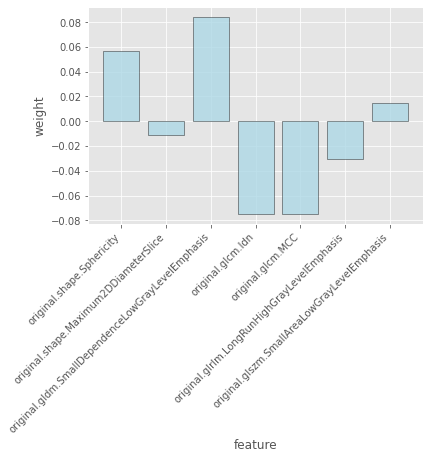

In [16]:
# 绘制特征权重图
import matplotlib.pyplot as plt
%matplotlib inline

x_values = np.arange(len(index))
y_values = coef[coef !=0]
plt.bar(x_values, y_values
        , color = 'lightblue'
        , edgecolor = 'black'
        , alpha = 0.8
       )
plt.xticks(x_values,index
           , rotation='45'
           , ha = 'right'
            ,va = 'top'
          )
plt.xlabel('feature')
plt.ylabel('weight')
plt.show()

NameError: name 'MultipleLocator' is not defined

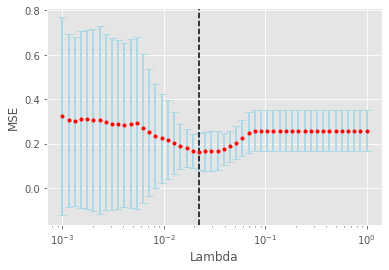

In [17]:
# Lambda图_
MSEs = lasso_cv.mse_path_

MSEs_mean = np.apply_along_axis(np.mean,1,MSEs)
MSEs_std = np.apply_along_axis(np.std,1,MSEs)

plt.figure() #dpi=300
plt.errorbar(lasso_cv.alphas_, MSEs_mean
            , yerr=MSEs_std
            , fmt="o"
            , ms=3
            , mfc="r"
            , mec="r"
            , ecolor="lightblue"
            , elinewidth=2
            , capsize=4
            , capthick=1)
plt.semilogx()
plt.axvline(lasso_cv.alpha_, color='black',ls='--')
plt.xlabel('Lambda')
plt.ylabel('MSE')
ax = plt.gca()
y_major_locator = MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show

In [18]:
# RadiomicScore计算
X_SS[X.columns[lasso_cv.coef_!=0]]

,original.shape.Sphericity,original.shape.Maximum2DDiameterSlice,original.gldm.SmallDependenceLowGrayLevelEmphasis,original.glcm.Idn,original.glcm.MCC,original.glrlm.LongRunHighGrayLevelEmphasis,original.glszm.SmallAreaLowGrayLevelEmphasis
0,0.302521,-1.074269,1.881111,-1.186314,-1.146018,-0.671789,1.879805
1,0.828694,0.344398,-0.225124,-0.739870,-1.280120,-0.548513,-0.293106
2,-0.472820,-0.439512,-1.125611,1.314683,1.260173,2.351706,-1.297865
3,-1.270269,1.852235,-0.699989,1.021994,1.178780,-0.172125,-1.115463
4,-1.037350,-0.271736,1.477840,-1.268712,-1.138042,-0.658642,1.633581
5,-0.682053,1.267116,-0.557589,0.023608,0.440095,-0.455761,0.135653
6,-0.258169,-0.341645,0.318028,-0.649166,-0.432252,-0.600102,1.031807
7,0.857563,-0.123955,-1.083978,1.198554,1.110358,0.879747,-1.253613
8,-0.030269,-1.182634,1.747562,-0.662593,-1.057940,-0.673681,1.033127
9,0.865427,-1.918920,0.575553,-0.614986,-0.503871,-0.612779,0.464263


In [19]:
case_Radscore = X_SS[X.columns[lasso_cv.coef_!=0]] * coef[coef !=0]
Radscore = case_Radscore.apply(lambda x: x.sum(), axis=1)
Radscore

0     0.411493
1     0.187832
2    -0.400953
3    -0.328782
4     0.293415
5    -0.119105
6     0.130756
7    -0.259657
8     0.324008
9     0.229279
10   -0.305246
11   -0.400620
12   -0.300757
13    0.341482
14    0.231782
15    0.167954
16   -0.261905
17   -0.296037
18    0.018877
19    0.176576
20    0.246570
21   -0.120573
22    0.049401
23   -0.015791
dtype: float64

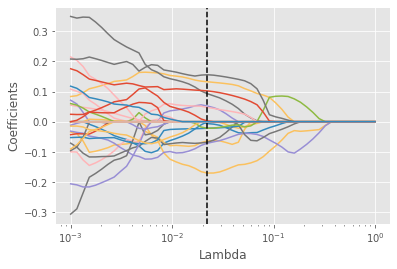

In [20]:
# 特征值随Lambda取值变化图
coefs = lasso_cv.path(X_SS, y, alphas=alphas, max_iter=100000)[1].T
plt.figure()
plt.semilogx(lasso_cv.alphas_, coefs, '-')
plt.axvline(lasso_cv.alpha_, color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()

In [114]:
# 导入数据
Clin_Radio_demographic = pd.read_csv('https://raw.githubusercontent.com/ttkkyycr/ttkkyycr/main/data2_MultiVA_rearranged.csv')
CR_dg = Clin_Radio_demographic.drop(['Specification','Name','TYPE','HAIC_sesion',
                                     'Gender','Age', 'HBV',  'ALT', 'AST', 'ALB', 'TBIL',
                                     'WBC','LY', 'NEUT', 'PLT', 'PT', 'INR', 'FIB','PVTT','Bilobal',
                                     'metastatesis','BCLC_stage'], axis=1)
CR_dg["Radscore"] = Radscore
CR_dg.head()

,ORR,Over7cm,Infiltration,Arterial_enhanced,Delay_enhanced,Uniformly_enhanced,Previous_treatment,AFP,CP_score,VP_grade,Radscore
0,1,1,1,0,0,0,0,4516.00,6,3,0.411493
1,1,1,0,1,1,0,1,41715.29,6,2,0.187832
2,0,0,0,0,0,0,1,14.25,6,0,-0.400953
3,0,1,0,1,0,1,0,2.45,5,0,-0.328782
4,1,1,0,0,1,0,0,393.30,5,3,0.293415


In [115]:
CR_dg.columns

Index(['ORR', 'Over7cm', 'Infiltration', 'Arterial_enhanced', 'Delay_enhanced',
       'Uniformly_enhanced', 'Previous_treatment', 'AFP', 'CP_score',
       'VP_grade', 'Radscore'],
      dtype='object')

In [116]:
# 转化AFP为分类变量（>400）
bins = [0,400,CR_dg['AFP'].max()]
print (bins)
AFP_cut = pd.cut(CR_dg['AFP'],bins)

CR_dg['AFP'] = AFP_cut.values.codes
CR_dg['AFP'] = CR_dg['AFP'].astype('category')

[0, 400, 56182.23]


In [117]:
# 计算NLR
NL_ratio = Clin_Radio_demographic['NEUT'] / Clin_Radio_demographic['LY']
CR_dg['NLR'] = NL_ratio

In [119]:
# 转化其他分类变量
from pandas.api.types import CategoricalDtype

# to_convert = ['ORR', 'Bilobal', 'Over7cm', 'Infiltration',
#               'Arterial_enhanced', 'Delay_enhanced', 'Uniformly_enhanced',
#               'Previous_treatment', 'VP_grade',
#               'metastatesis']
to_convert = ['ORR','Over7cm', 'Infiltration', 'Arterial_enhanced', 'Delay_enhanced',
              'Uniformly_enhanced','Previous_treatment', 'VP_grade',
              ]
CR_dg[to_convert] = CR_dg[to_convert].astype('category')
# CR_dg.BCLC_stage.values.categories = [1,2,3]
# print (CR_dg.BCLC_stage.values.categories)

# 导出数据
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
CR_dg.to_csv('out.zip', index=False,compression=compression_opts)

print (CR_dg.dtypes)
CR_dg.head()


ORR                   category
Over7cm               category
Infiltration          category
Arterial_enhanced     category
Delay_enhanced        category
Uniformly_enhanced    category
Previous_treatment    category
AFP                   category
CP_score                 int64
VP_grade              category
Radscore               float64
NLR                    float64
dtype: object


,ORR,Over7cm,Infiltration,Arterial_enhanced,Delay_enhanced,Uniformly_enhanced,Previous_treatment,AFP,CP_score,VP_grade,Radscore,NLR
0,1,1,1,0,0,0,0,1,6,3,0.411493,3.726496
1,1,1,0,1,1,0,1,1,6,2,0.187832,4.892473
2,0,0,0,0,0,0,1,0,6,0,-0.400953,1.865672
3,0,1,0,1,0,1,0,0,5,0,-0.328782,2.631868
4,1,1,0,0,1,0,0,0,5,3,0.293415,2.384615


In [120]:
import statsmodels.api as sm


X_multiVA = CR_dg.drop(['ORR'],axis=1)
y_multiVA = CR_dg['ORR']

model = sm.OLS(y_multiVA,sm.add_constant(X_multiVA))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ORR   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     4.593
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00707
Time:                        23:15:17   Log-Likelihood:                 3.1633
No. Observations:                  24   AIC:                             17.67
Df Residuals:                      12   BIC:                             31.81
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4126      0.496      0.831      0.422      -0.669       1.494
Over7cm               -0.3321      0.246     -1.348      0.203      -0.869       0.205
Infiltration          -0.0455      0.148     -0.307      0.764      -0.368       0.277
Arterial_enhanced      0.1360      0.232      0.587      0.568      -0.369       0.641
Delay_enhanced         0.0324      0.149      0.217      0.832      -0.293       0.358
Uniformly_enhanced    -0.1130      0.176     -0.641      0.534      -0.497       0.271
Previous_treatment    -0.1679      0.145     -1.157      0.270      -0.484       0.148
AFP                    0.2445      0.178      1.375      0.194      -0.143       0.632
CP_score               0.1108      0.076      1.453      0.172      -0.055       0.277
VP_grade              -0.0474      0.055     -0.869      0.402      -0.166       0.071
Radscore               1.5802      0.264      5.992      0.000       1.006       2.155
NLR                   -0.0575      0.052     -1.098      0.294      -0.172       0.057
==============================================================================
Omnibus:                        3.464   Durbin-Watson:                   2.319
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                2.303
Skew:                           0.756   Prob(JB):                        0.316
Kurtosis:                       3.133   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
x = range(6)
for n in x:
  print(n)

0
1
2
3
4
5


In [87]:
mylist = ["apple", "banana", "cherry"]
x = len(mylist)
x

3

In [121]:
list(CR_dg.columns)

['ORR',
 'Over7cm',
 'Infiltration',
 'Arterial_enhanced',
 'Delay_enhanced',
 'Uniformly_enhanced',
 'Previous_treatment',
 'AFP',
 'CP_score',
 'VP_grade',
 'Radscore',
 'NLR']

In [122]:
# 剔除非显著的因素
def looper(limit):
    cols = list(X_multiVA.columns)
    for i in range(len(cols)):
        data1 = CR_dg[cols]
        x = sm.add_constant(data1)
        y = y_multiVA
        model = sm.OLS(y,x)
        result = model.fit()
        result.summary()
        pvalues = result.pvalues
        pvalues.drop('const',inplace=True)
        pmax = max(pvalues)
        if pmax>limit:
            idn = pvalues.idxmax()
            cols.remove(idn)
        else: 
            return result

result = looper(0.05)
result.summary()
        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ORR   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     52.02
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           3.15e-07
Time:                        23:15:32   Log-Likelihood:                -2.0849
No. Observations:                  24   AIC:                             8.170
Df Residuals:                      22   BIC:                             10.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6250      0.056     11.107      0.000       0.508       0.742
Radscore       1.5601      0.216      7.213      0.000       1.111       2.009
==============================================================================
Omnibus:                        7.150   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                4.983
Skew:                           0.901   Prob(JB):                       0.0828
Kurtosis:                       4.319   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

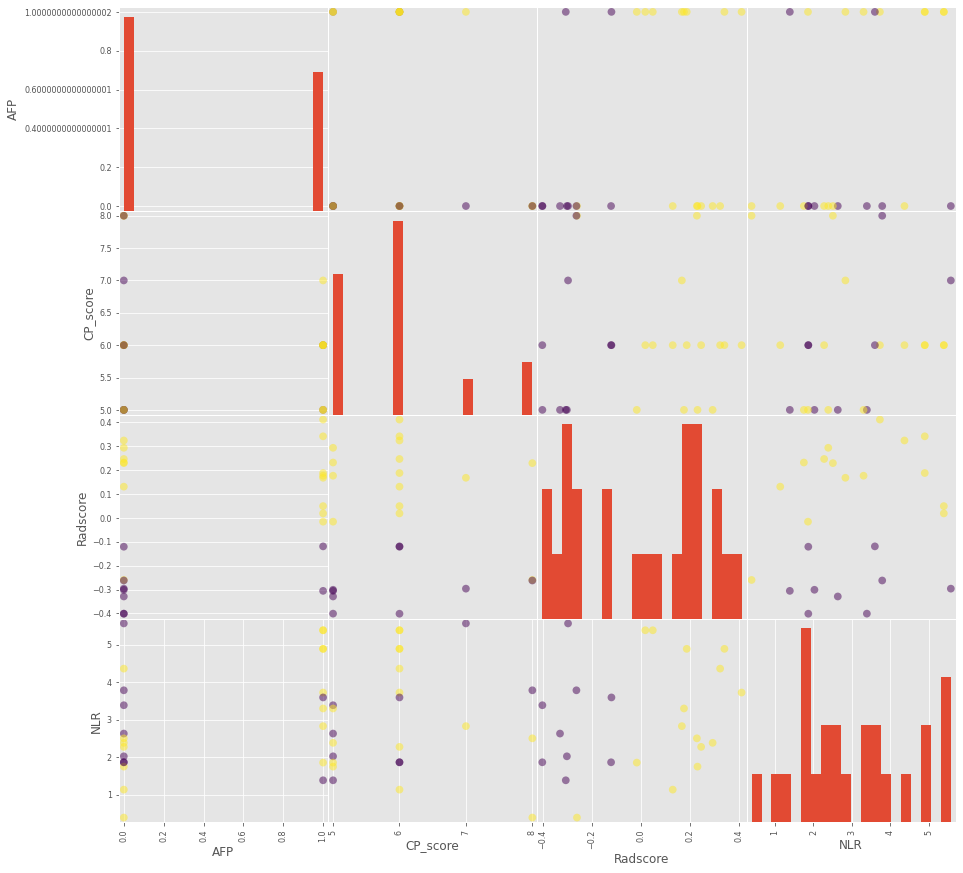

In [30]:
grr = pd.plotting.scatter_matrix(X_multiVA, c=y_multiVA, 
                        figsize=(15,15),
                        marker='o',
                        hist_kwds={'bins':20},
                        s=60, alpha=0.5)
#                                  cmap=mglearn.cm3)